In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import pyplot 

#plt.rcParams.update({'figure.max_open_warning': 2})
%matplotlib widget

Phases of external input: 
 [2.60922625]


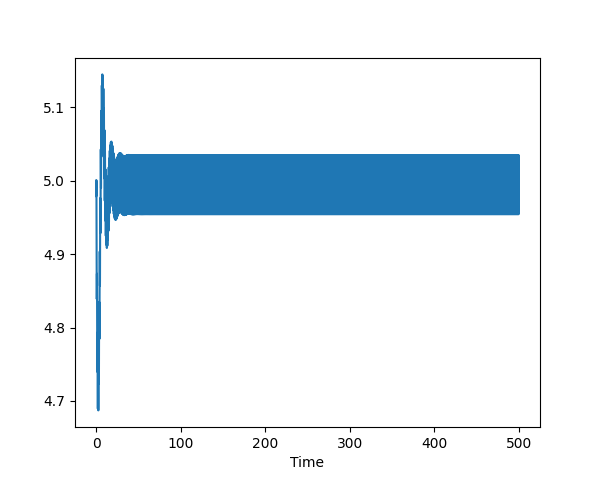

In [17]:
def adaptive_hopf(state, t, N, mu, eps, omega_iext, phi_iext):
    r = state[:N]
    phi = state[N:2*N]
    omega = state[2*N:3*N]
    
    r = r[:, None]
    phi = phi[:, None]
    omega = omega[:, None]
    omega_iext = omega_iext[:, None]
    phi_iext = phi_iext[:,None]
    
    iext = np.sum(1*np.sin(omega_iext*t + phi_iext), axis=0)
    
    #Real input signal
    dr = (mu - r*r)*r + eps*iext*np.cos(phi)
    dphi = omega - eps*iext*np.sin(phi)/r
    domega = -eps*iext*np.sin(phi)
    
    dt = np.concatenate((dr, dphi, domega), axis=0)
    
    return dt.flatten()

# Number of oscillators
N = 1

# Parameters
mu = 1
eps = 0.8

# Initial state
r = np.ones(N)
phi = 2*np.pi*np.random.rand(N)
omega = np.random.uniform(10, 20, size=N)

# Time range to solve the ODEs
MAX_RUN_TIME = 500
EPOCHS = 500000
dt = MAX_RUN_TIME/EPOCHS
t = np.linspace(0, MAX_RUN_TIME, EPOCHS)

# External input
omega_iext = np.asarray([(i+1)*5 for i in range(N)])
phi_iext = 2*np.pi*np.random.rand(N)
print("Phases of external input: \n", phi_iext)

#Set initial frequency
omega[:] = omega_iext

#Create state variable
state0 = np.concatenate((r, phi, omega))

# Solve the ODEs
state = odeint(adaptive_hopf, state0, t, args=(N, mu, eps, omega_iext, phi_iext))

r = state[:,0:N]
phi = state[:,N:2*N]
omega = state[:,2*N:3*N]

# Plot the results
f = plt.figure()
f.set_figwidth(6)
for i in range(N):
    #plt.plot(t, r[:,i], label='x')
    #plt.plot(t, phi[:, 1], label='phi')
    plt.plot(t, omega[:,i], label='omega')
#plt.legend()
plt.xlabel('Time')
plt.show()
#plt.close('all')

/tmp/ipykernel_30931/158456570.py:4: RuntimeWarning: More than 2 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


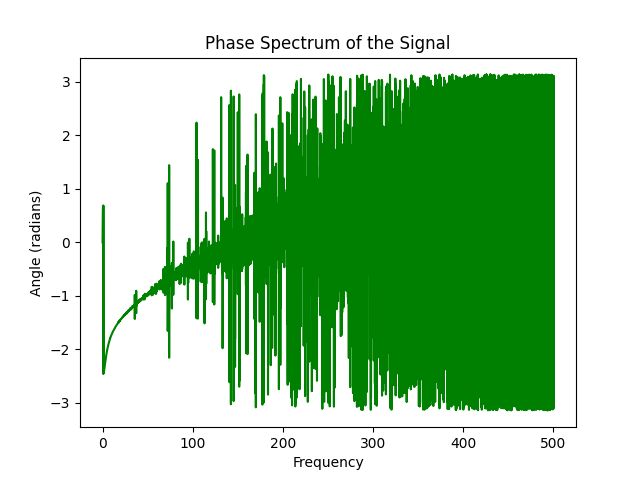

In [19]:
Iext = np.sum(1*np.sin(omega_iext[:,None]*t + phi_iext[:,None]), axis=0)

# plotting the phase spectrum of the signal 
f = plt.figure()
#f.set_figwidth(10)
#pyplot.phase_spectrum(Iext, Fs=20, color ='green') #unwrapped
pyplot.angle_spectrum(Iext, Fs=1/dt, color ='green') #wrapped
#pyplot.angle_spectrum(np.sin(phi[:,0]), Fs=1/dt, color ='red')
# pyplot.phase_spectrum(x[:,1], Fs=20, color ='blue')
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()
# plt.close('all')
# pyplot.close(f)

In [ ]:
plt.close('all')